In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv(r'../data/raw/FoodBalanceSheets_E_All_Data_(Normalized).csv', encoding='latin-1')

In [11]:
countries = pd.read_excel(r'../data/raw/country-region.xls')
countries = countries[countries['ISO2 Code'].isna() == False]['Country Code'].tolist()

In [12]:
food_information = data[(
    data['Element Code'].isin([5301,511])
)][
    data['Area Code'].isin(countries)
]

/Users/jonathandavis/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [13]:
food_information = food_information[['Area Code', 'Item', 'Year Code', 'Value']]

In [14]:
food_information_pivot = pd.pivot_table(food_information, values='Value', index=['Area Code', 'Year Code'], columns=['Item']).reset_index()

In [15]:
len(food_information_pivot.columns)

119

In [132]:
food_information_pivot.columns[food_information_pivot.isna().sum()/food_information_pivot.shape[0] < 0.05]

Index([                      u'Area Code',                       u'Year Code',
                   u'Alcoholic Beverages',                     u'Animal fats',
                   u'Apples and products',         u'Aquatic Products, Other',
                               u'Bananas',             u'Barley and products',
                                 u'Beans',                            u'Beer',
                  u'Beverages, Alcoholic',                     u'Bovine Meat',
                          u'Butter, Ghee',            u'Cassava and products',
                           u'Cephalopods',        u'Cereals - Excluding Beer',
                        u'Cereals, Other',        u'Cocoa Beans and products',
                 u'Coconuts - Incl Copra',             u'Coffee and products',
                           u'Crustaceans',                   u'Demersal Fish',
                                  u'Eggs',              u'Fats, Animals, Raw',
                         u'Fish, Seafood',          

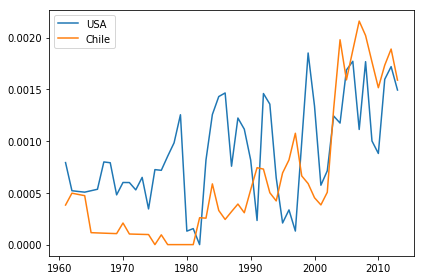

In [17]:
plt.plot(
    food_information_pivot[food_information_pivot['Area Code'] == 231]['Year Code'],
    food_information_pivot[food_information_pivot['Area Code'] == 231]['Alcohol, Non-Food']
        / food_information_pivot[food_information_pivot['Area Code'] == 231]['Population'],
    label='USA'
)
plt.plot(
    food_information_pivot[food_information_pivot['Area Code'] == 40]['Year Code'],
    food_information_pivot[food_information_pivot['Area Code'] == 40]['Alcohol, Non-Food']
        / food_information_pivot[food_information_pivot['Area Code'] == 40]['Population'],
    label='Chile'
)
plt.tight_layout()
plt.legend()
plt.show()